# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de pessoas pretas por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [62]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# O dataset boston não está disponível no sklearn, então o mesmo será carregado por outra fonte.
# boston = datasets.load_boston()
# X = pd.DataFrame(boston.data, columns = boston.feature_names)
# y = pd.DataFrame(boston.target, columns = ['MEDV'])

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_df = pd.read_csv('housing.csv', sep="\s+", skiprows=22, header=None, names=column_names)
raw_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6


In [25]:
## checando por nulos 
raw_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [27]:

# Como já estou importando o dataframe completo não será necessário, mas o comando que seria utilizado seria o comando abaixo:
# Agrupa os 2 Dataframes em um.
# raw_df = pd.concat([X, y], axis=1)

# No lugar, vamos analisar o perfil das colunas do nosso dataframe;
raw_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,3.759989,11.662190,11.330310,0.072314,0.556437,6.290605,68.518595,3.735627,9.807851,413.599174,18.463017,355.297190,12.679174,22.544008
std,8.766728,23.764895,6.936898,0.259275,0.118018,0.710895,28.447452,2.124833,8.813355,170.252171,2.145556,92.997197,7.167669,9.315331
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.130000,0.000000,0.448000,5.884750,43.625000,2.064700,4.000000,279.000000,17.400000,374.650000,6.990000,16.775000
50%,0.262660,0.000000,9.900000,0.000000,0.538000,6.211500,77.700000,3.057250,5.000000,345.000000,19.100000,391.340000,11.360000,21.200000
75%,3.896877,20.000000,18.100000,0.000000,0.631000,6.630000,94.100000,5.116700,24.000000,666.000000,20.200000,396.215000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [35]:
raw_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.206381,0.401418,-0.060838,0.418021,-0.224706,0.358798,-0.374577,0.622605,0.579493,0.296945,-0.381906,0.463967,-0.393057
ZN,-0.206381,1.000000,-0.549842,-0.046429,-0.525520,0.314538,-0.580345,0.681118,-0.325195,-0.329617,-0.393369,0.180488,-0.428303,0.366270
INDUS,0.401418,-0.549842,1.000000,0.055956,0.763270,-0.398885,0.657748,-0.705752,0.587957,0.715322,0.395254,-0.352096,0.612305,-0.488006
CHAS,-0.060838,-0.046429,0.055956,1.000000,0.087594,0.090028,0.088239,-0.092852,-0.015652,-0.044885,-0.126562,0.053195,-0.056050,0.176896
NOX,0.418021,-0.525520,0.763270,0.087594,1.000000,-0.303417,0.741878,-0.770560,0.609459,0.665993,0.192294,-0.377298,0.598275,-0.427658
RM,-0.224706,0.314538,-0.398885,0.090028,-0.303417,1.000000,-0.241427,0.210554,-0.217617,-0.300185,-0.363557,0.129762,-0.616481,0.693071
AGE,0.358798,-0.580345,0.657748,0.088239,0.741878,-0.241427,1.000000,-0.770335,0.466292,0.518139,0.283323,-0.280617,0.600750,-0.374692
DIS,-0.374577,0.681118,-0.705752,-0.092852,-0.770560,0.210554,-0.770335,1.000000,-0.488190,-0.526782,-0.223700,0.285212,-0.514088,0.252464
RAD,0.622605,-0.325195,0.587957,-0.015652,0.609459,-0.217617,0.466292,-0.488190,1.000000,0.908749,0.483347,-0.440528,0.496859,-0.388123
TAX,0.579493,-0.329617,0.715322,-0.044885,0.665993,-0.300185,0.518139,-0.526782,0.908749,1.000000,0.479303,-0.437757,0.553387,-0.475074


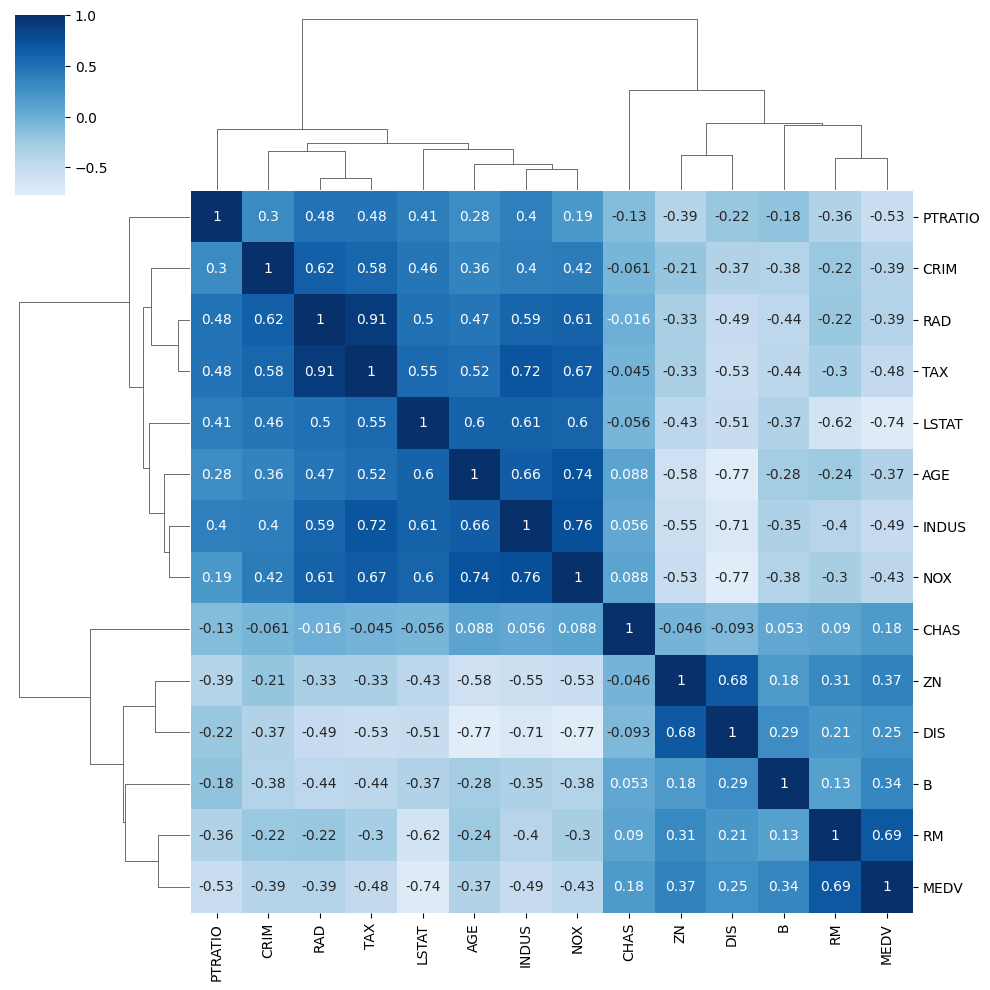

In [30]:
sns.clustermap(raw_df.corr(), figsize = (10, 10), annot = True, center = 0, cmap = 'Blues')


O numero de quartos (RM) é a variável que mais se correlaciona com o valor mediano das casas (MEDV), com uma correlação positiva de 0.69; 

### 3. Separe os dados em validação e teste

In [33]:
X = raw_df.drop('MEDV', axis = 1)
y = raw_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=8732360)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [51]:
regr_a = DecisionTreeRegressor(max_depth=8, min_samples_leaf=round(X_train.shape[0]/40))
regr_b = DecisionTreeRegressor(max_depth=2, min_samples_leaf=round(X_train.shape[0]/10))

regr_a.fit(X_train, y_train)
regr_b.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=34)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [55]:
# Calculando para a base de treino
mse_a = mean_squared_error(y_train, regr_a.predict(X_train))
mse_b = mean_squared_error(y_train, regr_b.predict(X_train))
r2_a = regr_a.score(X_train, y_train)
r2_b = regr_b.score(X_train, y_train)

r2_resposta = 'O r2 da árvore com profundidade {0} é: {1:.2f}'
mse_resposta = 'O mse da árvore com profundidade {0} é: {1:.2f}'

print(mse_resposta.format(regr_a.get_depth(),mse_a))
print(r2_resposta.format(regr_a.get_depth(),r2_a))
print(mse_resposta.format(regr_b.get_depth(),mse_b))
print(r2_resposta.format(regr_b.get_depth(),r2_b))

O mse da árvore com profundidade 8 é: 11.32
O r2 da árvore com profundidade 8 é: 0.87
O mse da árvore com profundidade 2 é: 33.28
O r2 da árvore com profundidade 2 é: 0.63


In [56]:
# Calculando para a base de teste
mse_a = mean_squared_error(y_test, regr_a.predict(X_test))
mse_b = mean_squared_error(y_test, regr_b.predict(X_test))
r2_a = regr_a.score(X_test, y_test)
r2_b = regr_b.score(X_test, y_test)

r2_resposta = 'O r2 da árvore com profundidade {0} é: {1:.2f}'
mse_resposta = 'O mse da árvore com profundidade {0} é: {1:.2f}'

print(mse_resposta.format(regr_a.get_depth(),mse_a))
print(r2_resposta.format(regr_a.get_depth(),r2_a))
print(mse_resposta.format(regr_b.get_depth(),mse_b))
print(r2_resposta.format(regr_b.get_depth(),r2_b))

O mse da árvore com profundidade 8 é: 17.93
O r2 da árvore com profundidade 8 é: 0.77
O mse da árvore com profundidade 2 é: 30.71
O r2 da árvore com profundidade 2 é: 0.61


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A arvore com maior profundidade parece mais adequada. O valor dos errro quadrático médio é menor tanto para a base de treinamento quanto para a base de teste. O inverso se torna verdadeiro quando olhamos o r2.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

In [65]:
tree_data = tree.export_graphviz(regr_a, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

graph = graphviz.Source(tree_data, format="png") 
graph.view()

'Source.gv.png'


(eog:601762): Atk-CRITICAL **: 21:51:29.410: atk_object_ref_state_set: assertion 'ATK_IS_OBJECT (accessible)' failed

(eog:601762): Gtk-CRITICAL **: 21:51:29.410: gtk_accessible_get_widget: assertion 'GTK_IS_ACCESSIBLE (accessible)' failed


Como Previsto, a variável RM é a mais importante na árvore. Ela é a primeira a ser usada para separar os dados, e logo no primeiro corte observamos que os imoveis mais caros são aqueles com mais quartos.